In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=cd1e0c866e5501edfff63e4f1fea67d46c4f0d1081aefd49a21d68b7320861e4
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 40.7 MB/s eta 0:00:00



U = exp[i(α σx + β σy + γ σz)] =
 [[0.707+0.j    0.   +0.707j]
 [0.   +0.707j 0.707+0.j   ]]


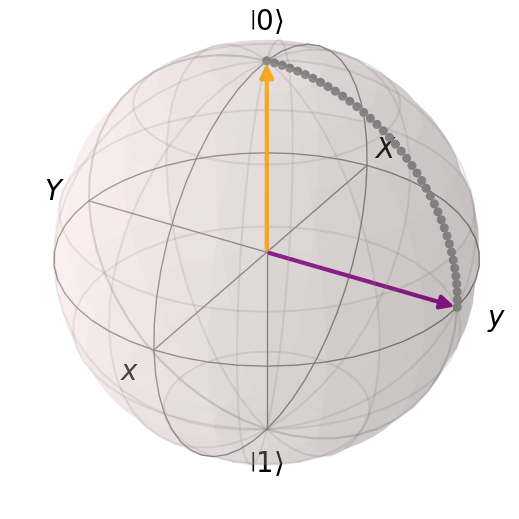

In [2]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = np.pi / 4
beta  = 0
gamma = 0

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1], [0]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()



U = exp[i(α σx + β σy + γ σz)] =
 [[ 0.707+0.j  0.707+0.j]
 [-0.707+0.j  0.707+0.j]]


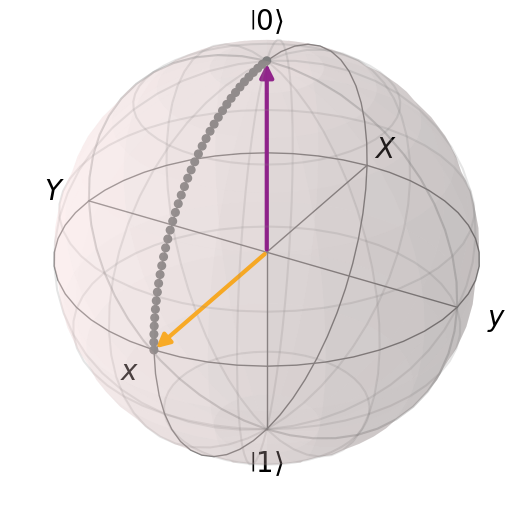

In [3]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = 0
beta  = np.pi / 4
gamma = 0

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1/np.sqrt(2)], [1/np.sqrt(2)]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()



U = exp[i(α σx + β σy + γ σz)] =
 [[0.707+0.707j 0.   +0.j   ]
 [0.   +0.j    0.707-0.707j]]


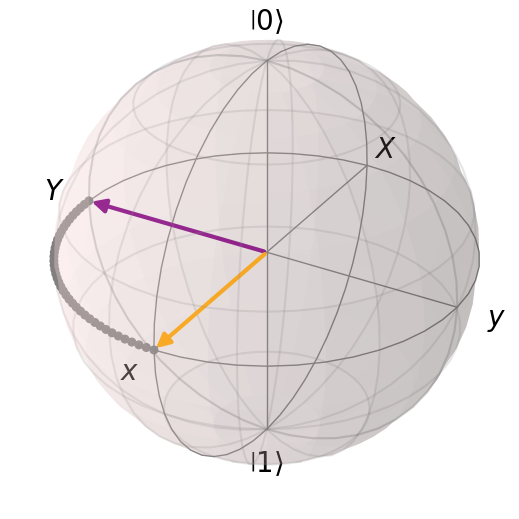

In [5]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = 0
beta  = 0
gamma = np.pi / 4

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1/np.sqrt(2)], [1/np.sqrt(2)]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()



U = exp[i(α σx + β σy + γ σz)] =
 [[0.+0.707j 0.+0.707j]
 [0.+0.707j 0.-0.707j]]


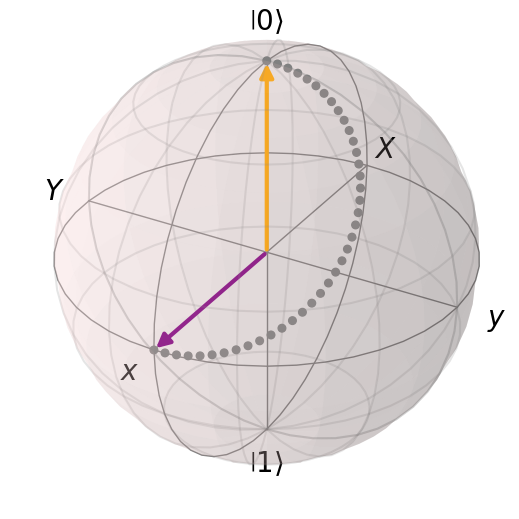

In [6]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = np.pi / (2*np.sqrt(2))
beta  = 0
gamma = np.pi / (2*np.sqrt(2))

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1], [0]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()



U = exp[i(α σx + β σy + γ σz)] =
 [[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]]


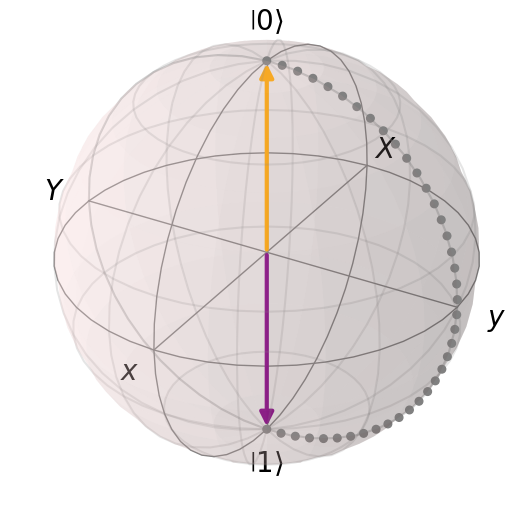

In [7]:
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = np.pi /2
beta  = 0
gamma = 0

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1], [0]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()


## Grover's algorithm

Feel free to modify any of the constants in the following cell.

$n$, `SHOTS` $\in \mathbb{Z^{+}}$

`SEARCH_VALUES` $\subseteq \{\,x \in \mathbb{W} \mid 0 \le x \lt 2^{n}\,\}$

In [13]:
"""Number of qubits."""
N: int = 4

"""Set of m nonnegative integers to search for using Grover's algorithm (i.e. TARGETS in base 10)."""
SEARCH_VALUES: set[int] = { 5 }

"""Amount of times to simulate the algorithm."""
SHOTS: int = 10000

In [14]:
from qiskit import QuantumRegister as qr

"""Set of m N-qubit binary strings representing target state(s) (i.e. SEARCH_VALUES in base 2)."""
TARGETS: set[str] = { f"{s:0{N}b}" for s in SEARCH_VALUES }

"""N-qubit quantum register."""
QUBITS: qr = qr(N, "qubit")

In [15]:
TARGETS

{'0101'}

## Oracle

Oracle $U_{w}$ flips the sign(s) of $n$-qubit target state(s) while leaving all other orthogonal states unchanged.

$U_{w} = X(MCZ)X$

Pauli-X gate $X$ is applied to qubit $|q_{i} \rangle$ if $q_{i} = 0$ in target state $|q_{n - 1}, \ldots, q_{0} \rangle$. After $X$ is applied to the appropriate qubit(s), target state is transformed to $|1 \rangle^{\otimes n}$. Then $(n − 1)$-control Z gate $MCZ$ flips the sign of $|1 \rangle^{\otimes n}$.

We simulate $MCZ$ by applying Hadamard gate $H$, $(n - 1)$-control Toffoli gate $MCT$, and another $H$ to qubit $|q_{n - 1}\rangle$:

$MCZ = H(MCT)H$

Finally, $X$ is applied again to the appropriate qubit(s) to reverse the transformation by the first $X$. This entire process is applied to all target state(s), which we've implemented in `oracle()`:

$U_{w} = XH(MCT)HX$

In [16]:
from qiskit import QuantumCircuit as qc

def flip(target: str, qc: qc, qubit: str = "0") -> None:
    """Flips qubit in target state.

    Args:
        target (str): Binary string representing target state.
        qc (qc): Quantum circuit.
        qubit (str, optional): Qubit to flip. Defaults to "0".
    """
    for i in range(len(target)):
        if target[i] == qubit:
            qc.x(i) # Pauli-X gate

def oracle(targets: set[str] = TARGETS, name: str = "Oracle") -> qc:
    """Mark target state(s) with negative phase.

    Args:
        targets (set[str]): Binary string(s) representing target state(s). Defaults to TARGETS.
        name (str, optional): Quantum circuit's name. Defaults to "Oracle".

    Returns:
        qc: Quantum circuit representation of oracle.
    """
    # Create N-qubit quantum circuit for oracle
    oracle = qc(QUBITS, name = name)

    for target in targets:
        # Reverse target state since Qiskit uses little-endian for qubit ordering
        target = target[::-1]

        # Flip zero qubits in target
        flip(target, oracle, "0")

        # Simulate (N - 1)-control Z gate
        oracle.h(N - 1)                       # Hadamard gate
        oracle.mcx(list(range(N - 1)), N - 1) # (N - 1)-control Toffoli gate
        oracle.h(N - 1)                       # Hadamard gate

        # Flip back to original state
        flip(target, oracle, "0")

    return oracle

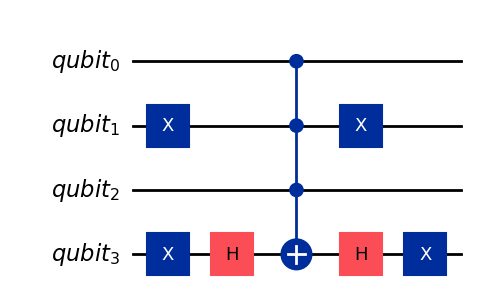

In [17]:
# Generate and display oracle
grover_oracle = oracle()
grover_oracle.draw("mpl", style = "iqp")

## Diffuser

Diffuser $D$ amplifies the target state(s) (which deamplifies all other states) with a reflection about the average amplitude. In other words, it increases the probability of getting the $n$-qubit target state(s) marked by $U_{w}$ and, ultimately, the right answer.

$D = H^{\otimes n}U_{0}H^{\otimes n}$

We create $D$ by applying $H^{\otimes n}$, $U_{w}$ with its target state $w$ set to $|0 \rangle^{\otimes n}$, and $H^{\otimes n}$ again to each qubit. This leaves us with the final equation we've implemented in `diffuser()`:

In [18]:
def diffuser(name: str = "Diffuser") -> qc:
    """Amplify target state(s) amplitude, which decreases the amplitudes of other states
    and increases the probability of getting the correct solution (i.e. target state(s)).

    Args:
        name (str, optional): Quantum circuit's name. Defaults to "Diffuser".

    Returns:
        qc: Quantum circuit representation of diffuser (i.e. Grover's diffusion operator).
    """
    # Create N-qubit quantum circuit for diffuser
    diffuser = qc(QUBITS, name = name)

    diffuser.h(QUBITS)                                    # Hadamard gate
    diffuser.append(oracle({ "0" * N }), list(range(N)))  # Oracle with all zero target state
    diffuser.h(QUBITS)                                    # Hadamard gate

    return diffuser

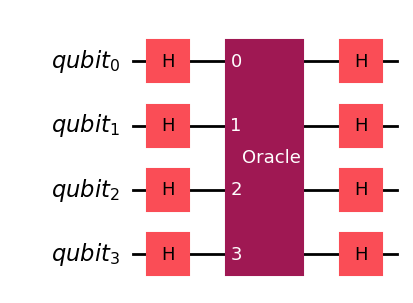

In [19]:
# Generate and display diffuser
grover_diffuser = diffuser()
grover_diffuser.draw("mpl", style = "iqp")

## Grover's Algorithm

Grover's algorithm, also known as quantum search algorithm, finds $m$ target(s) within a database of size $N$; this is particularly useful for unstructured searches. A search is performed by evaluating a function (i.e. $U_{w}$) that returns a particular value for the target(s) and another value for all other objects in the database. More generally, it solves the problem of function inversion: Given $y = f(x)$ where $x$ can take $N$ values, Grover's algorithm finds the value $x = f^{−1}(y)$ with $O(\sqrt{N})$ evaluations; a naïve exhaustive search (i.e. classical algorithm) would require about $O(N)$ evaluations. This is a significant, quadratric speed-up!

$m, N \in \mathbb{Z^{+}}$

The first step of the algorithm involves encoding all objects of the database as orthogonal states. That is, initializing all $n$ qubits to $|0 \rangle$. Assuming maximum uncertainty about the $n$-qubit target state(s), the initial state is chosen to be the uniform superposition $|s \rangle$ of all basis states:

$|s \rangle = (H|0 \rangle)^{\otimes n}$

We do this by applying $H$ on all qubits. Afterwards, we increase the likelihood of detecting the target state(s) at the end by applying $U_{w}$ followed by $D$ (also known as Grover operator) to $|s \rangle$ an optimal amount of times $t$. After $t$ iterations, the state(s) will have transformed to $|\psi_{t} \rangle$:

$|\psi_{t} \rangle = (DU_{w})^{t}|s \rangle$

Where:

$t \in \mathbb{Z^{+}}$

$t \approx \lfloor \frac{\pi}{4} \sqrt{\frac{N}{m}}\rfloor$

In this case, $N = 2^{n}$, so $t$ can be simplified:

$t \approx \lfloor \frac{\pi}{4} \sqrt{\frac{2^{n}}{m}}\rfloor$

The final step involves measuring $|\psi_{t} \rangle$, which should return the target state(s) with near-certainty (i.e. probability very close to $1$).

In [20]:
from math import pi, sqrt
from qiskit.quantum_info import DensityMatrix as dm

def grover(oracle: qc = oracle(), diffuser: qc = diffuser(), name: str = "Grover Circuit", n_of: int = 1) -> tuple[qc, dm]:
    """Create quantum circuit representation of Grover's algorithm,
    which consists of 4 parts: (1) state preparation/initialization,
    (2) oracle, (3) diffuser, and (4) measurement of resulting state.

    Steps 2-3 are repeated an optimal number of times (i.e. Grover's
    iterate) in order to maximize probability of success of Grover's algorithm.

    Args:
        oracle (qc, optional): Quantum circuit representation of oracle. Defaults to oracle().
        diffuser (qc, optional): Quantum circuit representation of diffuser. Defaults to diffuser().
        name (str, optional): Quantum circuit's name. Defaults to "Grover Circuit".

    Returns:
        tuple[qc, dm]: Quantum circuit representation of Grover's algorithm and its density matrix.
    """
    # Create N-qubit quantum circuit for Grover's algorithm
    grover = qc(QUBITS, name = name)

    # Intialize qubits with Hadamard gate (i.e. uniform superposition)
    grover.h(QUBITS)

    # Apply barrier to separate steps
    grover.barrier()

    # Apply oracle and diffuser (i.e. Grover operator) optimal number of times
    for _ in range(n_of):
        grover.append(oracle, list(range(N)))
        grover.append(diffuser, list(range(N)))

    # Generate density matrix representation of Grover's algorithm
    density_matrix = dm(grover)

    # Measure all qubits once finished
    grover.measure_all()

    return grover, density_matrix

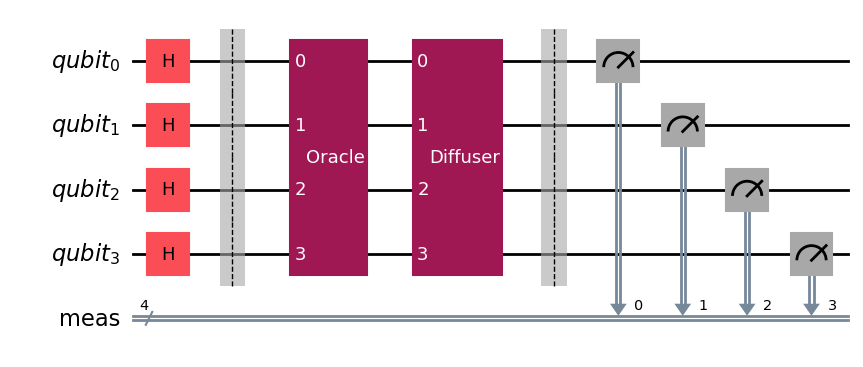

In [21]:
# (1) Generate and display quantum circuit for Grover's algorithm, and (2) Get density matrix
n_applied = 1 #int((pi / 4) * sqrt((2 ** N) / len(TARGETS)))
grover_circuit, density_matrix = grover(grover_oracle, grover_diffuser, n_of=n_applied)
grover_circuit.draw("mpl", style = "iqp")

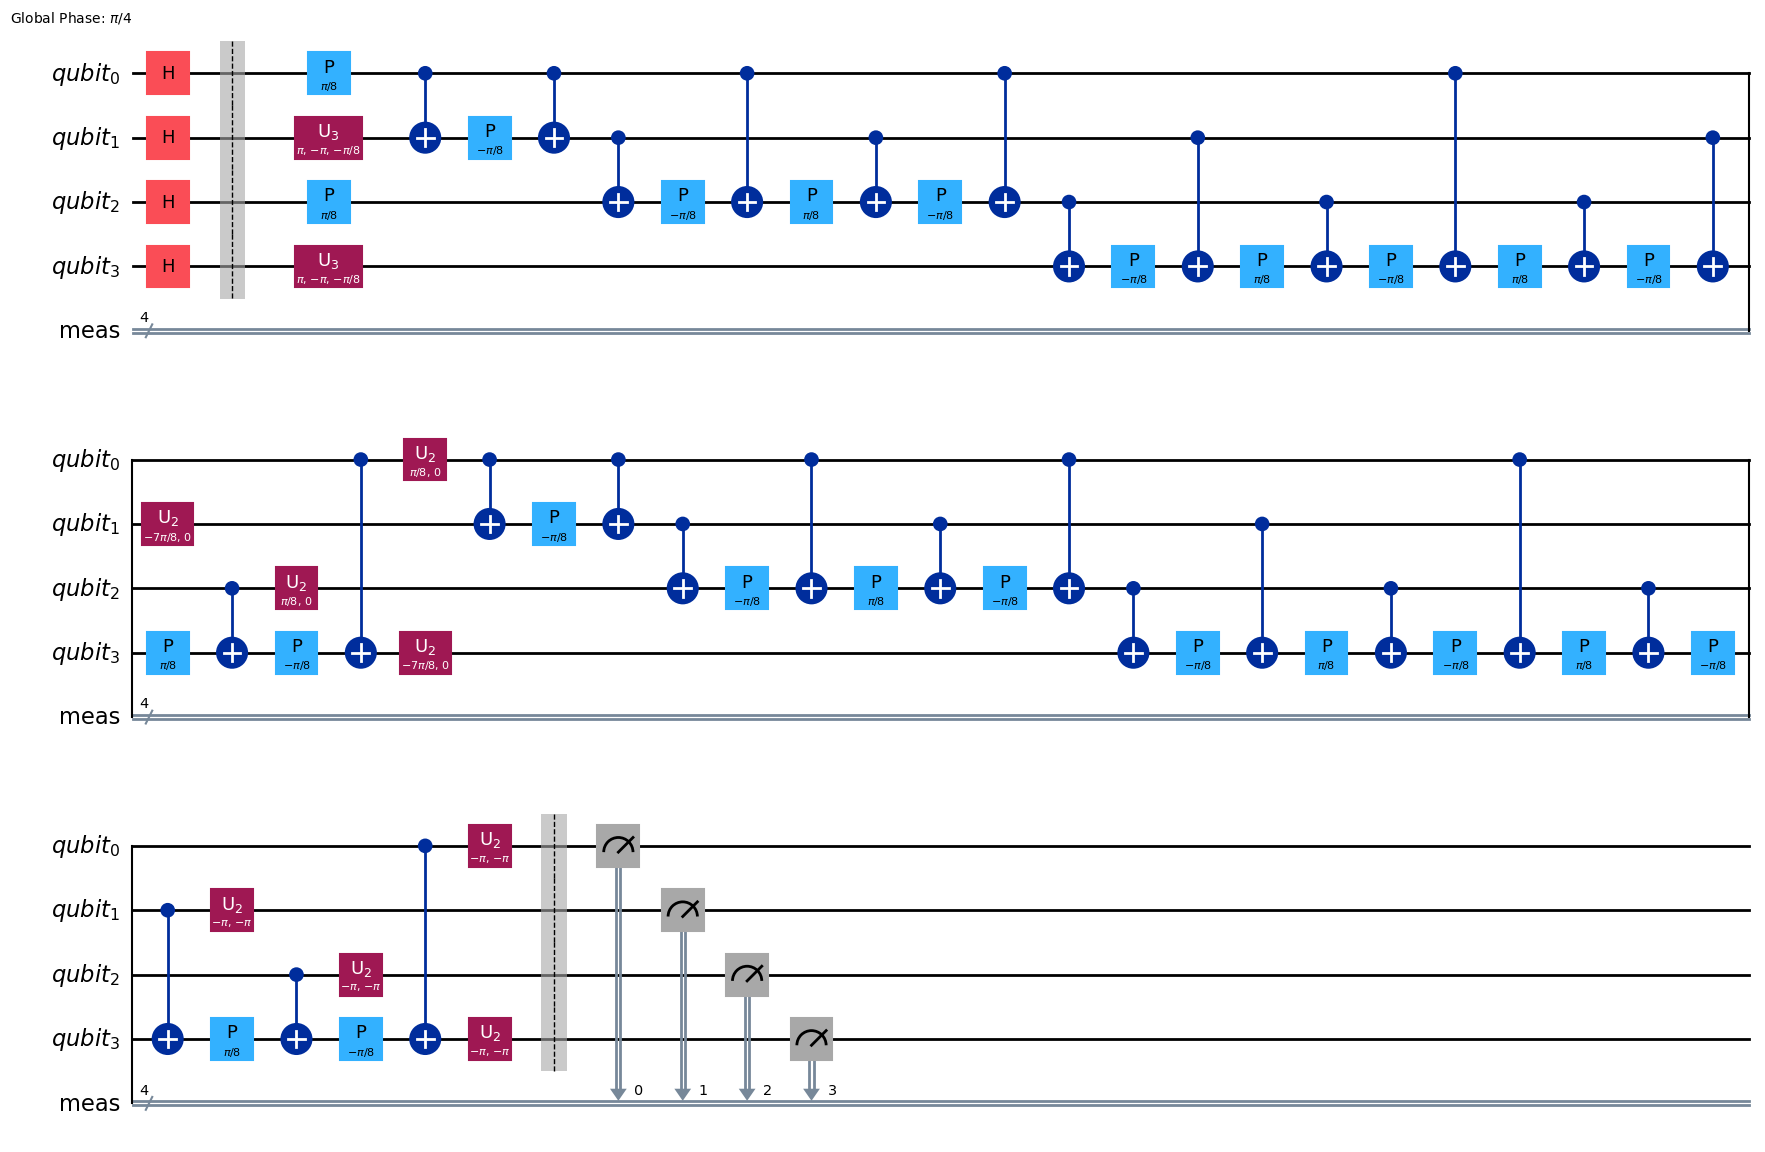

In [22]:
from heapq import nlargest
from qiskit import transpile
from qiskit_aer import AerSimulator

# Simulate Grover's algorithm locally
backend = AerSimulator(method = "density_matrix")

# Transpile circuit
transpiled = transpile(grover_circuit, backend, optimization_level = 2)

# Display transpiled circuit
transpiled.draw("mpl", style = "iqp")

In [23]:
# Run simulation
simulation = backend.run(transpiled, shots = SHOTS)

# Get results
results = simulation.result().get_counts()

# State(s) with highest count and their frequencies
winners = { winner : results.get(winner) for winner in nlargest(len(TARGETS), results, key = results.get) } # type: ignore

def outcome(winners: list[str], counts) -> None:
    """Print top measurement(s) (state(s) with highest frequency)
    and target state(s) in binary and decimal form, determine
    if top measurement(s) equals target state(s), then print result.

    Args:
        winners (list[str]): State(s) (N-qubit binary string(s))
        with highest probability of being measured.
        counts (Counts): Each state and its respective frequency.
    """
    print("WINNER(S):")
    print(f"Binary = {winners}\nDecimal = {[ int(key, 2) for key in winners ]}\n")

    print("TARGET(S):")
    print(f"Binary = {TARGETS}\nDecimal = {SEARCH_VALUES}\n")

    if not all(key in TARGETS for key in winners): print ("Target(s) not found...")

    else:
        winners_frequency, total = 0, 0

        for value, frequency in counts.items():
            if value in winners:
                winners_frequency += frequency
            total += frequency

        print(f"Target(s) found with {winners_frequency / total:.2%} accuracy!")

# Print outcome
outcome(list(winners.keys()), results)

WINNER(S):
Binary = ['0101']
Decimal = [5]

TARGET(S):
Binary = {'0101'}
Decimal = {5}

Target(s) found with 46.93% accuracy!


In [24]:
results

{'1111': 364,
 '1010': 349,
 '1001': 323,
 '0101': 4693,
 '1110': 355,
 '1101': 334,
 '0001': 350,
 '0011': 385,
 '0111': 365,
 '1011': 333,
 '0110': 377,
 '1000': 356,
 '1100': 331,
 '0010': 336,
 '0000': 377,
 '0100': 372}

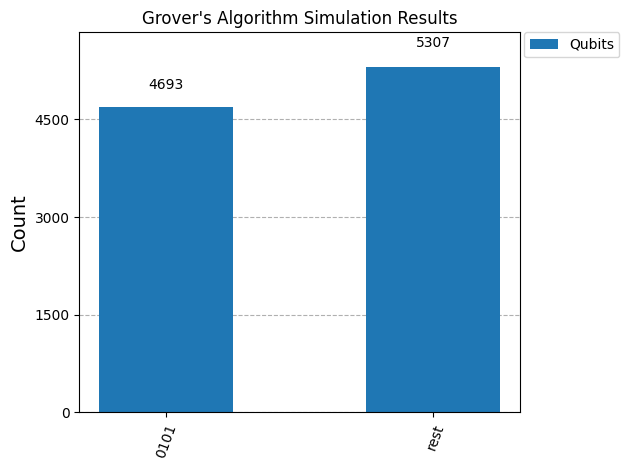

In [25]:
from qiskit.visualization import plot_histogram

# Display simulation results as histogram
plot_histogram(data = results, legend = ["Qubits"], number_to_keep = len(TARGETS), title = "Grover's Algorithm Simulation Results")

### City Plot

City plot is made up of two 3D bar graphs representing the real and imaginary parts of an $n$-qubit state. Each bar's length is proportional to the magnitude of the corresponding number.

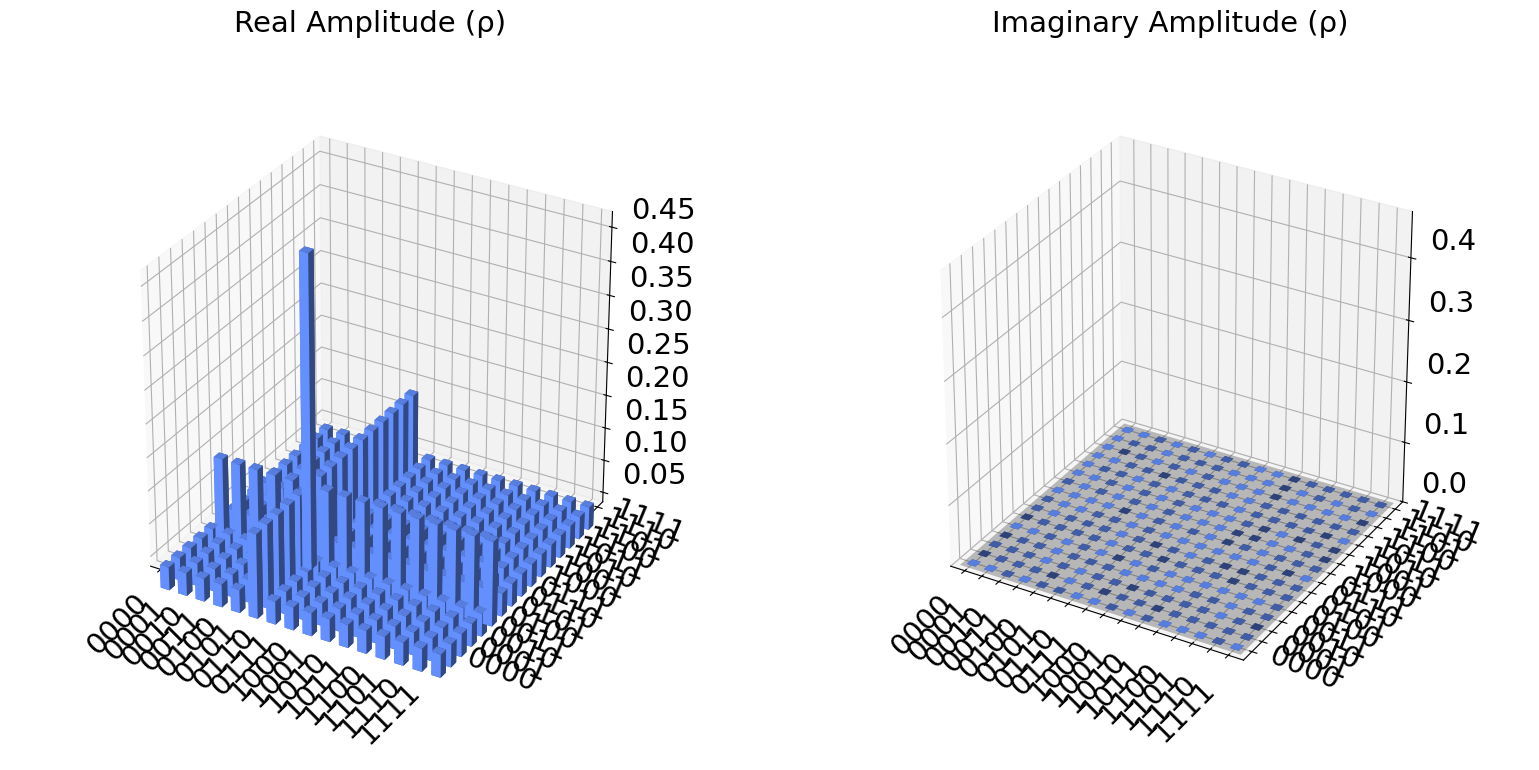

In [26]:
# City plot of density_matrix
density_matrix.draw("city")

### Bloch Sphere

Bloch sphere is a 3D geometric representation of a single qubit's state. A point $(\theta, \phi)$ on the sphere's surface denotes a pure state, represented by state vector $|\psi \rangle$, with its north and south poles corresponding to $|0 \rangle$ and $|1 \rangle$ respectively. This means that we can always say for certain (100% probability) that our system's in state $|\psi \rangle$. In other words, for a pure state we have complete knowledge of the system and know exactly what state it's in.

$|\psi \rangle = \alpha|0 \rangle + \beta|1 \rangle$

Probability amplitudes $\alpha$ and $\beta$ can be real or complex numbers.

$\alpha = cos(\frac{\theta}{2})$

$\beta = e^{i \phi} sin(\frac{\theta}{2})$

$\theta, \phi \in \mathbb{R}$ where $0 \le \theta \le \pi$ and $0 \le \phi \le 2\pi$.

The probability of obtaining $|0 \rangle$ and $|1 \rangle$ after measurement is $|\alpha|^{2}$ and $|\beta|^{2}$ respectively, hence the total probability of the system being observed in $|0 \rangle$ or $|1 \rangle$ is 1:

$|\alpha|^{2} + |\beta|^{2} = 1$

A point inside the sphere denotes a mixed state, represented by density matrix $\hat{\rho}$, which is a probability distribution of different pure states, with a maximally mixed state at the sphere's center (equal probabilities of being observed in $|0 \rangle$ or $|1 \rangle$). $\hat{\rho}$ is a generalized version of a state vector and is used to represent the system when we're uncertain of its state.

$\hat{\rho} = \sum\limits_{k}^{N} p_{k} |\psi_{k} \rangle \langle\psi_{k}| =
\displaystyle\frac{1}{2} \begin{bmatrix}1 + r_{z} & r_{x} - ir_{y} \\ r_{x} + ir_{y} & 1 - r_{z}\end{bmatrix}$

Weights $p_{k}$ can be interpreted as the probability of the system being in state $|\psi_{k} \rangle$ where $0 \lt p_{k} \le 1$. Note: $\hat{\rho}$ of a pure state naturally reduces to $|\psi \rangle$ with $p = 1$.

$N$ is the total number of possible states the system could be in with $\sum\limits_{k}^{N} p_{k} = 1$.

$|\psi_{k} \rangle \langle\psi_{k}|$ represents the outer product of the state $|\psi_{k} \rangle$ with itself, producing a matrix known as the projection operator $\hat{P}_{\psi_{k}}$.

Coefficients $r_{x}, r_{y}, r_{z}$ are components of the vector representing a mixed state, known as the Bloch vector $\vec{r}$.

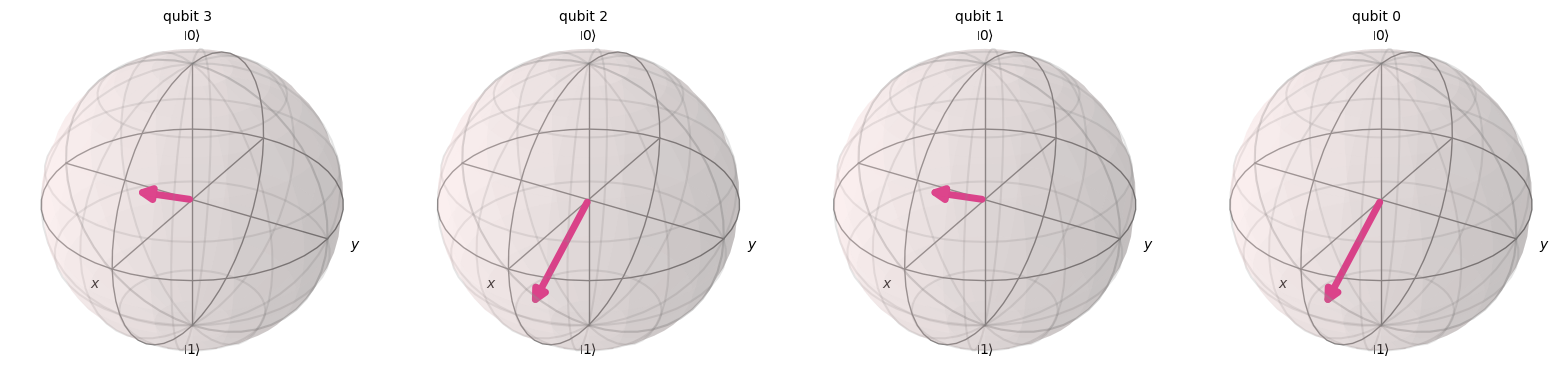

In [27]:
# Bloch sphere representation of density_matrix
# reverse_bits = True since Qiskit uses little-endian for qubit ordering
density_matrix.draw("bloch", reverse_bits = True)

### Hinton Plot

Hinton plot represents the real and imaginary parts of $n$-qubit state(s) on 2D plots by using squares. Positive and negative values are represented by white and black squares respectively, and the size of each square represents the magnitude of each value.

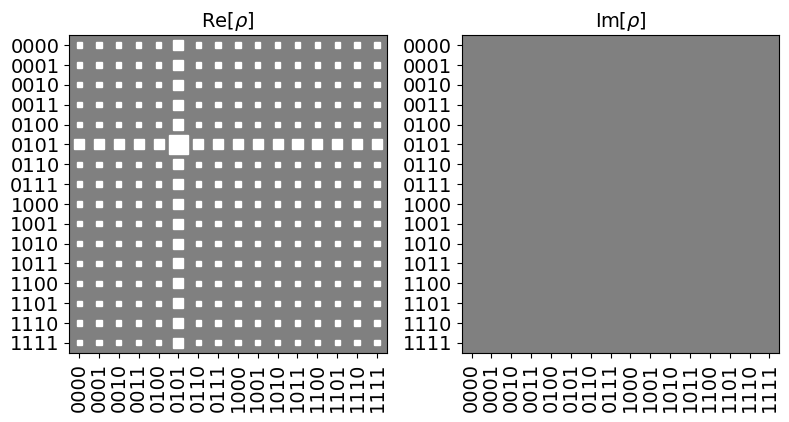

In [28]:
# Hinton plot of density_matrix
density_matrix.draw("hinton")

### Q-Sphere

Q-Sphere is a visualization of $n$-qubit state(s) that associates each computational basis state with a point on the surface of a sphere. A node is visible at each point; each node's radius is proportional to the probability $p_{k}$ of its basis state, whereas the node color indicates its phase $\varphi_{k}$. The sphere's north and south poles correspond to basis states $|0 \rangle^{\otimes n}$ and $|1 \rangle^{\otimes n}$ respectively, with all other basis states in between. Beginning at the north pole and progressing southward, each successive latitude has basis states with a greater number of $1$'s; a basis state's latitude is determined by its Hamming distance from $|0 \rangle^{\otimes n}$. The vector(s) on the sphere represents the system's density matrix.

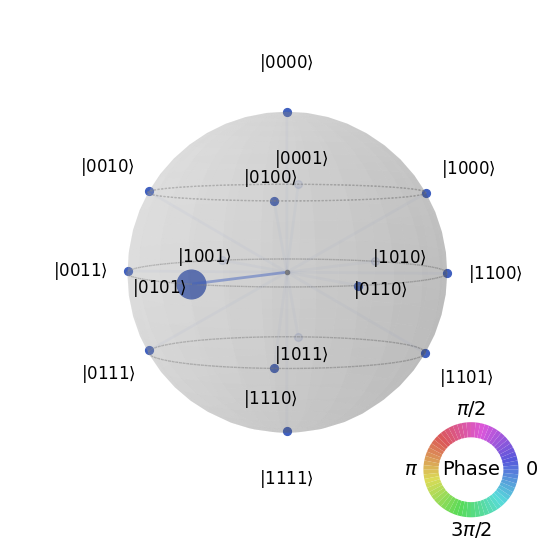

In [29]:
# Qsphere representation of density_matrix
density_matrix.draw("qsphere")


## Quantum Fourier Transform

The quantum Fourier transform (for short: QFT) is a linear transformation on quantum bits, and is the quantum analogue of the discrete Fourier transform.

Like the classical Fourier transform, quantum Fourier transform (QFT) takes data from the original signal representation to the frequency domain representation. The QFT differs from the classical Fourier transform in that it operates on a superposition state and produces a different superposition state as the output.

The quantum Fourier transform can be performed efficiently on a quantum computer, with a particular decomposition into a product of simpler unitary matrices. Using a simple decomposition, the discrete Fourier transform on ${\displaystyle 2^{n}}$ amplitudes can be implemented as a quantum circuit consisting of only ${\displaystyle O(n^{2})}$ Hadamard gates and controlled phase shift gates, where ${\displaystyle n}$ is the number of qubits. This can be compared with the classical discrete Fourier transform, which takes ${\displaystyle O(n2^{n})}$ gates (where ${\displaystyle n}$ is the number of bits), which is exponentially more than ${\displaystyle O(n^{2})}$. However, the quantum Fourier transform acts on a quantum state, whereas the classical Fourier transform acts on a vector, so not every task that uses the classical Fourier transform can take advantage of this exponential speedup.

${x = cos\theta_1 + isin\theta_1 = e^{i\theta_1}}$
${y = cos\theta_2 + isin\theta_2 = e^{i\theta_2}}$

${x \cdot y = (cos\theta_1 + isin\theta_1)(cos\theta_2 + isin\theta_2) = cos(\theta_1 + \theta_2) + isin(\theta_1 + \theta_2) = e^{i(\theta_1 + \theta_2)}}$

The interesting part here is that when we multiply the two complex numbers, their angles add up.

If we consider the n-th roots of unity, i.e. the n complex solutions of ${x^n = 1}$:

<img src="n_th_roots.png" width="500" height="320"/>

Since the unit vectors which represent these complex numbers are pointing out in all directions, if we add them up they'll cancel out completely:<br>
${1 + \omega + \omega^2 + ... + \omega^{n-1} = 0}$

More generally: <br>
${1 + \omega^j + \omega^{2j} + ... + \omega^{{(n-1)}j} = 0 \ if \ j \neq 0, \ n \ if \ j = 0}$

$
QFT_N = \frac{1}{\sqrt{N}}
\begin{bmatrix}
    1 & 1 & 1 & 1 & \dots & 1 \\
    1 & \omega & \omega^2 & \omega^3 & \dots & \omega^{N-1} \\
    1 & \omega^2 & \omega^3 & \omega^4 & \dots & \omega^{2(N-1)} \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \omega^{N-1} & \omega^{2(N-1)} & \omega^{3(N-1)} & \dots & \omega^{(N-1)^2}
\end{bmatrix}
$

This above is the Quantum Fourier Transform operator, whose entries are the n-th roots of unity.

Let's see an example for N = 4:

$
QFT_4 = \frac{1}{2}
\begin{bmatrix}
    1 & 1 & 1 & 1 \\
    1 & i & -1 & -i \\
    1 & -1 & 1 & -1 \\
    1 & -i & -1 & i
\end{bmatrix}
$

If we apply it to a state:

$
QFT_4 = \frac{1}{2}
\begin{bmatrix}
    1 & 1 & 1 & 1 \\
    1 & i & -1 & -i \\
    1 & -1 & 1 & -1 \\
    1 & -i & -1 & i
\end{bmatrix}
\begin{bmatrix}
    \alpha_0 \\
    \alpha_1 \\
    \alpha_2 \\
    \alpha_3
\end{bmatrix} =
\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \beta_3
\end{bmatrix}
$

In braket notation:

${\alpha_0|0\rangle + \alpha_1|1\rangle + \alpha_2|2\rangle + \alpha_3|3\rangle}$

${|2\rangle \xrightarrow{QTF_4} \frac{1}{2}|0\rangle - \frac{1}{2}|1\rangle + \frac{1}{2}|2\rangle - \frac{1}{2}|3\rangle}$ since we're considering the third column.

The crucial point for our purposes is that QFT has two nice properties:

#### 1) Convolution-Multiplication

$
QFT_N = \frac{1}{\sqrt{N}}
\begin{bmatrix}
    1 & 1 & 1 & 1 & \dots & 1 \\
    1 & \omega & \omega^2 & \omega^3 & \dots & \omega^{N-1} \\
    1 & \omega^2 & \omega^3 & \omega^4 & \dots & \omega^{2(N-1)} \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \omega^{N-1} & \omega^{2(N-1)} & \omega^{3(N-1)} & \dots & \omega^{(N-1)^2}
\end{bmatrix}
\begin{bmatrix}
    \alpha_0 \\
    \alpha_1 \\
    \alpha_2 \\
    \vdots \\
    \alpha_{N-1}
\end{bmatrix} =
\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_{N-1}
\end{bmatrix}
$
MEASURE $\implies$ see j w.p. $|\beta_j|^2$

$
QFT_N = \frac{1}{\sqrt{N}}
\begin{bmatrix}
    1 & 1 & 1 & 1 & \dots & 1 \\
    1 & \omega & \omega^2 & \omega^3 & \dots & \omega^{N-1} \\
    1 & \omega^2 & \omega^3 & \omega^4 & \dots & \omega^{2(N-1)} \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \omega^{N-1} & \omega^{2(N-1)} & \omega^{3(N-1)} & \dots & \omega^{(N-1)^2}
\end{bmatrix}
\begin{bmatrix}
    \alpha_N \\
    \alpha_0 \\
    \alpha_1 \\
    \vdots \\
    \alpha_{N-1}
\end{bmatrix} =
\begin{bmatrix}
    \beta_0 \\
    \omega\beta_1 \\
    \omega^2\beta_2 \\
    \vdots \\
    \omega^{N-1}\beta_{N-1}
\end{bmatrix}
$
MEASURE $\implies$ see j w.p. $|\beta_j|^2$

This means that any way you shift the input superposition is not going to make any difference to the output probabililty distribution.

#### 2) Periodic Function

$
\begin{bmatrix}
    \alpha_0 \\
    \alpha_1 \\
    \alpha_2 \\
    \vdots \\
    \alpha_{r-1} \\
    \vdots \\
    \alpha_0 \\
    \alpha_1 \\
    \alpha_2 \\
    \vdots \\
    \alpha_{r-1}
\end{bmatrix}
$
${\xrightarrow{QFT_M}}$
$
\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_{\frac{M}{r}} \\
    \vdots \\
    \beta_0 \\
    \beta_1 \\
    \beta_2 \\
    \vdots \\
    \beta_{\frac{M}{r}}
\end{bmatrix}
$

Let's consider a special case where ${\alpha_j}$ is periodic with period ${r}$ but it has non-zero values only in $0, r, 2r, ... , M-r$.<br>
If we apply ${QFT_M}$:

$
\sqrt{\frac{r}{M}}
\begin{bmatrix}
    1 \\
    0 \\
    \vdots \\
    0 \\
    1 \\
    0 \\
    \vdots \\
    0 \\
    1 \\
    0 \\
    \vdots
\end{bmatrix}
$
$\xrightarrow{QFT_M}$
$
\frac{1}{\sqrt{r}}
\begin{bmatrix}
    1 \\
    0 \\
    \vdots \\
    0 \\
    1 \\
    0 \\
    \vdots \\
    0 \\
    1 \\
    0 \\
    \vdots
\end{bmatrix}
$

Which in kat notation is

$\large{\sqrt{\frac{r}{M}} \sum_{j=0}^{\frac{M}{r}-1} |jr\rangle \xrightarrow{QFT} \sum_{j=0}^{M-1} \beta_j|j\rangle}$

Let's figure out what ${\beta_j}$ looks like when $j$ is a multiple of $\frac{M}{r}$

$\large\beta_{k\frac{M}{r}} = \sum_{j=0}^{\frac{M}{r}-1} \sqrt{\frac{r}{M}} \cdot \frac{1}{\sqrt{M}} \cdot \omega^{jr \cdot k\frac{M}{r}}$

As we can see the $r$ can be simplified and we obtain $\omega$ to some multiple of $M$, but $\omega^M = 1$, so...

$ \dots = \large\frac{M}{r} \cdot \frac{\sqrt{r}}{M} = \frac{1}{\sqrt{r}}$

The phase keep precessing at some rate proportional to the coefficient we're looking at, which is $\frac{kM}{r}$. So what we're doing is applying QFT to a periodic function and the period is such that every time we pick up the phase, the phase is exactly 1, so we have constructive interference.<br>
But how many such multiples of $\frac{M}{r}$ are there? Exactly $r$, so the rest of the components $\beta_j$ where $j$ is not a multiple of $\frac{M}{r}$ must be zero.

And what is $\beta_j$ for $j$ not a multiple of $\frac{M}{r}$?<br>
In this case the phase will not cancel out: it keeps precessing being simmetrically distributed around the circle and so when you add up all the vectors you get zero, destructive interference, and so $\beta_j = 0$.



#### Numerical example

We want to find the period of the function ${f(x) = x \mod 2}$.

It is easy to see that the period is 2.

We will use a 3-qubit system, so that q = 8.

$$
|0\rangle|0\rangle \xrightarrow{\text{QFT}} \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle|0\rangle
$$
<br>
$$
\frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle|0\rangle \xrightarrow{\text{Uf}} \frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle|x \mod 2\rangle
$$

Now we measure |$f\rangle$. Then |$f\rangle$ will collapse into either |0$\rangle$ or |1$\rangle$

Let's suppose that our measurement returns $|f(x)\rangle$ = |1$\rangle$

$$
\frac{1}{\sqrt{8}} \sum_{x=0}^{7} |x\rangle \otimes |f(x)\rangle \xrightarrow{\text{measure f}} \frac{1}{2} (|1\rangle + |3\rangle + |5\rangle + |7\rangle) \otimes |1\rangle
$$

Now we need to extract the period of the first register, applying again the Fourier transform

$$
\frac{1}{2} (|1\rangle + |3\rangle + |5\rangle + |7\rangle) \xrightarrow{\text{QFT}} \frac{1}{\sqrt{2}} (|0\rangle - |4\rangle)
$$

Finally, if we take a few measurements we will be sure to measure both |$0\rangle$ and |$4\rangle$.

Therefore q/r = 4, and since q = 8, it is clear that r = 2.

In [30]:

# Function to apply QFT
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

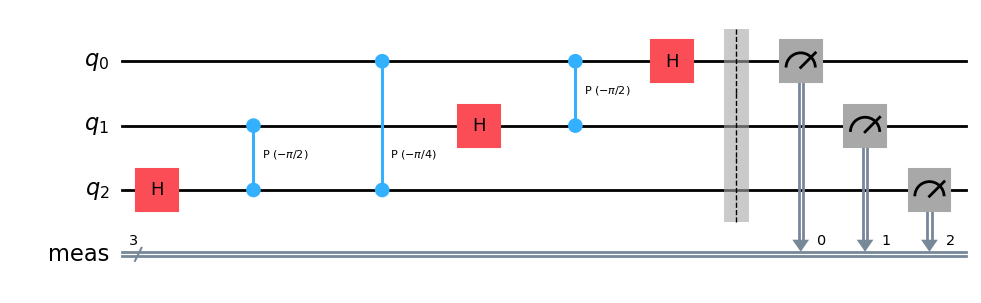

In [31]:
def apply_qft(circuit, n):
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(-np.pi/2**(j-k), k, j)
# Create a quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
# Apply QFT
apply_qft(qc, num_qubits)
# Measure the qubits
qc.measure_all()
# Draw the circuit after QFT
qc.draw('mpl')



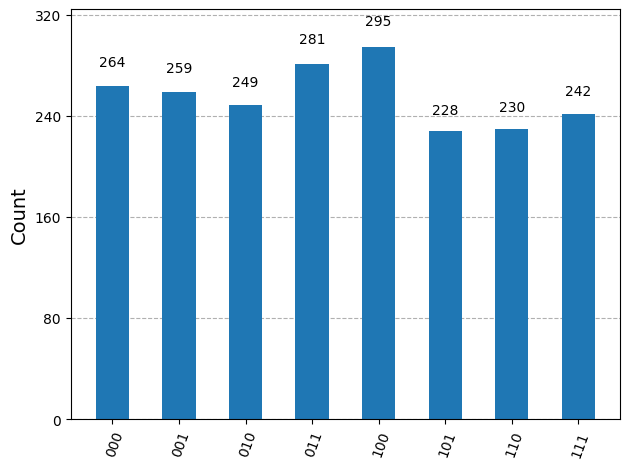

In [32]:

# Simulate the circuit
backend = AerSimulator()
# increase the number of shots for better statistics
backend.set_options(shots=2048)
transpiled_qc = transpile(qc, backend)

result = backend.run(transpiled_qc).result()
# Plot the results
counts = result.get_counts(qc)
plot_histogram(counts)
